![example](images/director_shot.jpeg)

## Microsoft Movie Studio Project

Author: Nat Berryman

## Overview

This project analysed over 1000 movies to identify what makes a successful movie. The analysis shows that most profitable movie studios, highest grossing genres and the best month to release certain movies. Microsoft can use this analysis as a starting point on what movies to produce however ongoing analysis will be required as there a multiple metrics which can be evaluated in order to make a succesful movie.

## Business Problem

The business problem that I set out to solve was, how can Microsoft's venture into the movie making industry be successful?

In order to solve this problem, I intended to find answer for the following questions:
1. What are the highest grossing production studios?
2. What is the highest grossing movie genres?
3. Are there any release date patterns?
4. Do rating or movie length impact revenue?
5. What other metrics can be evaluated to define what makes a good movie?

## Data Understanding

The data used for this analysis was the Title Basics and Title Ratings from IMDB, Movie Gross from Box Office Mojo and Movie Budgets from The Numbers. The sets represent the total movies number of movies released over a determined timeframe, the titles and production studios, the rating scores, primary and sub-genres along with the domestic and world gross revenue. It was identifed that these sets had the data required to make meaningful recommendations to the head of Microsofts movie studio.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from matplotlib import rcParams

%matplotlib inline

df_imdb_title_basics = pd.read_csv('./Data/imdb_title_basics.csv')
df_imdb_title_ratings = pd.read_csv('./Data/imdb_title_ratings.csv')
df_tn_movie_budgets = pd.read_csv('./Data/tn.movie_budgets.csv')
df_bom_movie_gross = pd.read_csv('./Data/bom_movie_gross.csv')

In [2]:
# Here you run your code to explore the data
df_imdb_title_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [3]:
df_imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [4]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
df_bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## Data Preparation

I started by merging the title basics, title ratings, movie budgets and movie gross data.
Once merged I dropped irrelevant columns and removed duplidate movie titles.
Then I split out the genres into primary genre columns and sub-genre columns and converted the dates into columns for easier evaluation. 

In [6]:
# Here you run your code to clean the data
df_imdb = pd.merge(df_imdb_title_basics, df_imdb_title_ratings, on=['tconst'])

In [7]:
df_tn_imdb = pd.merge(df_tn_movie_budgets, df_imdb, left_on='movie', right_on='primary_title')

In [8]:
df_tn_imdb_bom = pd.merge(df_tn_imdb, df_bom_movie_gross, left_on='movie', right_on='title')
df_tn_imdb_bom.head(2)

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,domestic_gross_y,foreign_gross,year
0,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",6.6,447624,Pirates of the Caribbean: On Stranger Tides,BV,241100000.0,804600000,2011
1,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,Avengers: Age of Ultron,BV,459000000.0,946400000,2015


Data Cleaning
- Release date data was split to month/year and converted it to datetime.
- Genre data was also split to primary genre and sub genre.
- Production Budget, Domestic Gross and Worldwide Gross data was converted to integers.
- Profit/Loss and Profit/Loss % columns were added by subtracting the production budget from worldwide gross.

In [9]:
df_tn_imdb_bom['release_date'] = pd.to_datetime(df_tn_imdb_bom['release_date'])

In [10]:
df_tn_imdb_bom["release_month"] = df_tn_imdb_bom['release_date'].map(lambda x: x.month)
df_tn_imdb_bom["release_year"] = df_tn_imdb_bom['release_date'].map(lambda x: x.year)

In [11]:
df_tn_imdb_bom[['primary_genre', 'sub_genre', 'other_genre']] = df_tn_imdb_bom['genres'].str.split(',', expand=True)

In [12]:
df_tn_imdb_bom['production_budget'] = df_tn_imdb_bom['production_budget'].replace("[$,]", "", regex=True).astype(int)

In [13]:
df_tn_imdb_bom['domestic_gross_x'] = df_tn_imdb_bom['domestic_gross_x'].replace("[$,]", "", regex=True).astype(int)

In [14]:
df_tn_imdb_bom['worldwide_gross'] = df_tn_imdb_bom['worldwide_gross'].replace("[$,]", "", regex=True).astype(int)

In [15]:
df_tn_imdb_bom['p_l'] = df_tn_imdb_bom['worldwide_gross'] - df_tn_imdb_bom['production_budget']

In [16]:
df_tn_imdb_bom['p_l_%'] = df_tn_imdb_bom['worldwide_gross'] / df_tn_imdb_bom['production_budget'] * 100

Irrelevant columns were then deleted.

In [17]:
df_tn_imdb_bom.drop(columns='release_date', inplace=True)

In [18]:
df_tn_imdb_bom.drop(columns='tconst', inplace=True)

In [19]:
df_tn_imdb_bom.drop(columns='primary_title', inplace=True)

In [20]:
df_tn_imdb_bom.drop(columns='original_title', inplace=True)

In [21]:
df_tn_imdb_bom.drop(columns='start_year', inplace=True)

In [22]:
df_tn_imdb_bom.drop(columns='title', inplace=True)

In [23]:
df_tn_imdb_bom.drop(columns='domestic_gross_y', inplace=True)

In [24]:
df_tn_imdb_bom.drop(columns='foreign_gross', inplace=True)

In [25]:
df_tn_imdb_bom.drop(columns='year', inplace=True)

In [26]:
df_tn_imdb_bom.drop(columns='other_genre', inplace=True)

In [27]:
df_tn_imdb_bom.drop(columns='genres', inplace=True)

In [28]:
df_tn_imdb_bom.shape

(1413, 15)

Investigated if there were any duplicate under movie column.

In [29]:
duplicate_rows = df_tn_imdb_bom['movie'].duplicated()
df_tn_imdb_bom['movie'][duplicate_rows]

24       Robin Hood
25       Robin Hood
26       Robin Hood
27       Robin Hood
28       Robin Hood
           ...     
1398    The Journey
1400        Jackpot
1401        Jackpot
1402        Jackpot
1405     Like Crazy
Name: movie, Length: 256, dtype: object

In [30]:
df_tn_imdb_bom = df_tn_imdb_bom.drop_duplicates(subset=['movie'], keep='first')

In [31]:
df_tn_imdb_bom.shape

(1157, 15)

Identified any missing values and replaced with '-' or zero.

In [32]:
df_tn_imdb_bom.isnull().sum()

id                     0
movie                  0
production_budget      0
domestic_gross_x       0
worldwide_gross        0
runtime_minutes        9
averagerating          0
numvotes               0
studio                 0
release_month          0
release_year           0
primary_genre          1
sub_genre            106
p_l                    0
p_l_%                  0
dtype: int64

In [33]:
df_tn_imdb_bom['primary_genre'].fillna('-', inplace=True)

In [34]:
df_tn_imdb_bom['sub_genre'].fillna('-', inplace=True)

In [35]:
df_tn_imdb_bom['runtime_minutes'].fillna('-', inplace=True)

In [36]:
df_tn_imdb_bom['runtime_minutes'] = df_tn_imdb_bom['runtime_minutes'].replace("-", "0", regex=True).astype(int)

In [37]:
df_tn_imdb_bom.isnull().sum()

id                   0
movie                0
production_budget    0
domestic_gross_x     0
worldwide_gross      0
runtime_minutes      0
averagerating        0
numvotes             0
studio               0
release_month        0
release_year         0
primary_genre        0
sub_genre            0
p_l                  0
p_l_%                0
dtype: int64

I identified the release year range for the data and removed anything prior to 2010.

In [38]:
df_tn_imdb_bom.groupby(['release_year']).count()

,id,movie,production_budget,domestic_gross_x,worldwide_gross,runtime_minutes,averagerating,numvotes,studio,release_month,primary_genre,sub_genre,p_l,p_l_%
release_year,,,,,,,,,,,,,,
1967,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1986,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2001,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2003,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2010,141,141,141,141,141,141,141,141,141,141,141,141,141,141
2011,156,156,156,156,156,156,156,156,156,156,156,156,156,156
2012,139,139,139,139,139,139,139,139,139,139,139,139,139,139
2013,128,128,128,128,128,128,128,128,128,128,128,128,128,128
2014,124,124,124,124,124,124,124,124,124,124,124,124,124,124


In [39]:
df_tn_imdb_bom = df_tn_imdb_bom[df_tn_imdb_bom['release_year']>=2010.00]
df_tn_imdb_bom.groupby(['release_year']).count()

,id,movie,production_budget,domestic_gross_x,worldwide_gross,runtime_minutes,averagerating,numvotes,studio,release_month,primary_genre,sub_genre,p_l,p_l_%
release_year,,,,,,,,,,,,,,
2010,141,141,141,141,141,141,141,141,141,141,141,141,141,141
2011,156,156,156,156,156,156,156,156,156,156,156,156,156,156
2012,139,139,139,139,139,139,139,139,139,139,139,139,139,139
2013,128,128,128,128,128,128,128,128,128,128,128,128,128,128
2014,124,124,124,124,124,124,124,124,124,124,124,124,124,124
2015,138,138,138,138,138,138,138,138,138,138,138,138,138,138
2016,138,138,138,138,138,138,138,138,138,138,138,138,138,138
2017,96,96,96,96,96,96,96,96,96,96,96,96,96,96
2018,90,90,90,90,90,90,90,90,90,90,90,90,90,90


In [40]:
df_tn_imdb_bom.shape

(1150, 15)

I then correlated the average rating and runtime against gross data. Both columns were deemed irellevent and were removed.

In [41]:
df_tn_imdb_bom.corr()['averagerating']

id                  -0.038253
production_budget    0.137759
domestic_gross_x     0.243081
worldwide_gross      0.232900
runtime_minutes      0.370137
averagerating        1.000000
numvotes             0.487380
release_month        0.203031
release_year         0.011226
p_l                  0.241751
p_l_%               -0.051546
Name: averagerating, dtype: float64

In [42]:
df_tn_imdb_bom.drop(columns='averagerating', inplace=True)

In [43]:
df_tn_imdb_bom.drop(columns='numvotes', inplace=True)

In [44]:
df_tn_imdb_bom.drop(columns='id', inplace=True)

In [45]:
df_tn_imdb_bom.corr()['runtime_minutes']

production_budget    0.319989
domestic_gross_x     0.264331
worldwide_gross      0.281179
runtime_minutes      1.000000
release_month        0.144284
release_year         0.056212
p_l                  0.248005
p_l_%               -0.076441
Name: runtime_minutes, dtype: float64

In [46]:
df_tn_imdb_bom.drop(columns='runtime_minutes', inplace=True)

In [47]:
df_tn_imdb_bom.shape

(1150, 11)

In [48]:
df_tn_imdb_bom.head()

,movie,production_budget,domestic_gross_x,worldwide_gross,studio,release_month,release_year,primary_genre,sub_genre,p_l,p_l_%
0,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,BV,5,2011,Action,Adventure,635063875,254.667286
1,Avengers: Age of Ultron,330600000,459005868,1403013963,BV,5,2015,Action,Adventure,1072413963,424.384139
2,Avengers: Infinity War,300000000,678815482,2048134200,BV,4,2018,Action,Adventure,1748134200,682.711400
3,Justice League,300000000,229024295,655945209,WB,11,2017,Action,Adventure,355945209,218.648403
4,Spectre,300000000,200074175,879620923,Sony,11,2015,Action,Adventure,579620923,293.206974


Data set was saved to data folder for analysis. I followed this by created a table of the highest world wide grossing movie by year and noticed 7 were Action movies and 2 were Adventure movies.

In [49]:
df_tn_imdb_bom.to_csv('./data/cleaned_df_tn_imdb_bom.csv')

In [50]:
df_tn_imdb_bom.groupby('release_year').apply(lambda x: x.sort_values('worldwide_gross', ascending=False).head(1))

,,movie,production_budget,domestic_gross_x,worldwide_gross,studio,release_month,release_year,primary_genre,sub_genre,p_l,p_l_%
release_year,,,,,,,,,,,,
2010,35,Toy Story 3,200000000,415004880,1068879522,BV,6,2010,Adventure,Animation,868879522,534.439761
2011,44,Transformers: Dark of the Moon,195000000,352390543,1123790543,P/DW,6,2011,Action,Adventure,928790543,576.302843
2012,37,Skyfall,200000000,304360277,1110526981,Sony,11,2012,Action,Adventure,910526981,555.263490
2013,104,Frozen,150000000,400738009,1272469910,BV,11,2013,Adventure,Drama,1122469910,848.313273
2014,22,Transformers: Age of Extinction,210000000,245439076,1104039076,Par.,6,2014,Action,Adventure,894039076,525.732893
2015,21,Jurassic World,215000000,652270625,1648854864,Uni.,6,2015,Action,Adventure,1433854864,766.909239
2016,10,Captain America: Civil War,250000000,408084349,1140069413,BV,5,2016,Action,Adventure,890069413,456.027765
2017,15,The Fate of the Furious,250000000,225764765,1234846267,Uni.,4,2017,Action,Crime,984846267,493.938507
2018,2,Avengers: Infinity War,300000000,678815482,2048134200,BV,4,2018,Action,Adventure,1748134200,682.711400


## Data Modeling

To assist in making the solid recommendations to Microsoft, first I grouped together the most profitable movie studios and kept to the top 5. It was found that BV studio was the most profitable by total gross. After some quick googling, I noticed that BV now came under Walt Disney Studios so the title was updated in the graph to reflect this update.

In [51]:
df1 = df_tn_imdb_bom.groupby('studio')[['p_l', 'p_l_%']].sum()
df1

,p_l,p_l_%
studio,,
3D,1.151520e+07,330.304060
A24,2.569054e+08,8909.086571
ALP,-2.307604e+07,11.245996
ATO,-1.022781e+07,18.177488
Affirm,2.447149e+07,807.689660
...,...,...
WB,1.390505e+10,32081.722683
WB (NL),6.392264e+09,64734.954263
WHE,-6.617054e+06,5.470657


In [52]:
df1.rename(columns={'p_l': 'total_profit', 'p_l_%': 'total_profit_percent'}, inplace=True)
df1

,total_profit,total_profit_percent
studio,,
3D,1.151520e+07,330.304060
A24,2.569054e+08,8909.086571
ALP,-2.307604e+07,11.245996
ATO,-1.022781e+07,18.177488
Affirm,2.447149e+07,807.689660
...,...,...
WB,1.390505e+10,32081.722683
WB (NL),6.392264e+09,64734.954263
WHE,-6.617054e+06,5.470657


In [53]:
df1 = df1.sort_values('total_profit', ascending = False)
df1

,total_profit,total_profit_percent
studio,,
BV,2.367069e+10,22718.189002
Uni.,2.072991e+10,79022.385135
Fox,1.847372e+10,36666.534992
WB,1.390505e+10,32081.722683
Sony,1.209079e+10,24598.542694
...,...,...
MNE,-3.347982e+07,401.568735
VE,-3.641967e+07,90.592526
Gold.,-4.560446e+07,224.300277


In [54]:
df1 = df1.head()
df1

,total_profit,total_profit_percent
studio,,
BV,2.367069e+10,22718.189002
Uni.,2.072991e+10,79022.385135
Fox,1.847372e+10,36666.534992
WB,1.390505e+10,32081.722683
Sony,1.209079e+10,24598.542694


In [55]:
df_top = df_tn_imdb_bom[df_tn_imdb_bom['studio'].isin(df1.index)]

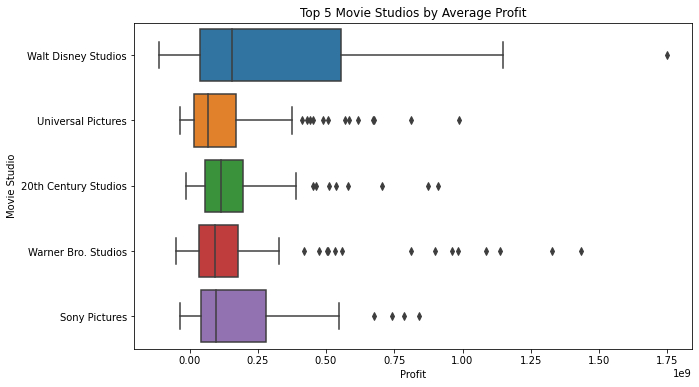

In [56]:
plt.figure(figsize = (10,6))
studio = sns.boxplot(x = df_top["p_l"], y = "studio",
           data = df_top)
plt.title("Top 5 Movie Studios by Average Profit");
plt.xlabel("Profit");
plt.ylabel("Movie Studio")
studio.set_yticklabels(['Walt Disney Studios', 'Universal Pictures', '20th Century Studios', 'Warner Bro. Studios', 'Sony Pictures']);
plt.savefig('Studio_Profit.png')
plt.show()

After noting that Action was the top movie genre in 7 out 9 years previously, I analysed further to include both primary genre and sub-genre. It was clear that these movie genres outperform all other genres by a considerable amount, however they require significant investment.

In [57]:
df_genres = df_tn_imdb_bom.groupby(['primary_genre', 'sub_genre'])[['production_budget', 'domestic_gross_x', 'worldwide_gross']].sum()
df_genres

production_budget  domestic_gross_x  worldwide_gross
primary_genre sub_genre                                                      
-             -               4.000000e+07      7.576467e+07     1.971157e+08
Action        -               1.337000e+08      1.924279e+07     1.360678e+08
              Adventure       2.043850e+10      2.373033e+10     6.752230e+10
              Animation       2.410000e+08      3.298462e+08     8.007930e+08
              Biography       2.575000e+08      5.650173e+08     1.159346e+09
...                                    ...               ...              ...
Music         -               1.800000e+07      3.419967e+06     9.082906e+06
Mystery       Sci-Fi          7.700000e+07      2.062536e+08     4.135377e+08
              Thriller        8.000000e+07      1.280129e+08     2.994618e+08
Romance       Sci-Fi          5.020000e+07      6.249564e+07     1.269313e+08
Thriller      -               1.899000e+08      2.038778e+08     6.015481e+08

[74 rows x 3 columns]

In [58]:
df_genres = df_genres.sort_values('worldwide_gross', ascending = False).head(5)
df_genres

,,production_budget,domestic_gross_x,worldwide_gross
primary_genre,sub_genre,,,
Action,Adventure,2.043850e+10,2.373033e+10,6.752230e+10
Adventure,Animation,6.385500e+09,8.564307e+09,2.448489e+10
Action,Crime,2.164200e+09,2.321522e+09,6.683098e+09
Biography,Drama,1.769500e+09,3.127733e+09,6.282374e+09
Comedy,Drama,2.023370e+09,3.318236e+09,5.944456e+09


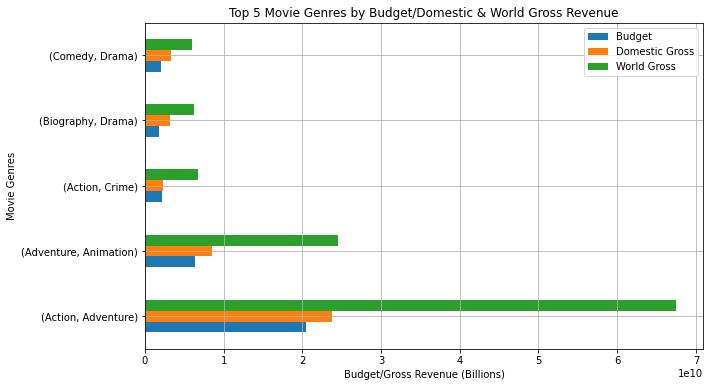

In [59]:
rcParams['figure.figsize'] = 10,6
df_genres.plot(kind='barh')
plt.grid(True)
plt.xlabel("Budget/Gross Revenue (Billions)");
plt.ylabel("Movie Genres");
plt.title("Top 5 Movie Genres by Budget/Domestic & World Gross Revenue");
plt.legend(['Budget','Domestic Gross', 'World Gross'])
plt.savefig('Rev_Genre.png')
plt.show()

Finally I focused on the Action movie release dates to identify any patterns or favourable release months. It was determined that May and June are the best time to release these movies.

In [60]:
df_month = df_tn_imdb_bom.groupby(['primary_genre','release_month'])[['domestic_gross_x', 'worldwide_gross']].sum()
df_month = df_month.head(13)
df_month = df_month.tail(12)

In [61]:
df_month

domestic_gross_x  worldwide_gross
primary_genre release_month                                   
Action        1                  1.417684e+09     3.454168e+09
              2                  2.265736e+09     5.584533e+09
              3                  2.576902e+09     6.807746e+09
              4                  2.144758e+09     7.313306e+09
              5                  4.897622e+09     1.453630e+10
              6                  5.483157e+09     1.472412e+10
              7                  4.408017e+09     1.220502e+10
              8                  2.211123e+09     5.419850e+09
              9                  1.141193e+09     3.262660e+09
              10                 8.992671e+08     3.022754e+09
              11                 3.458989e+09     9.426010e+09
              12                 2.749539e+09     7.383097e+09

In [62]:
df_month = df_month.rename(index={1: 'Jan', 2: 'Feb',3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

In [63]:
df_month

domestic_gross_x  worldwide_gross
primary_genre release_month                                   
Action        Jan                1.417684e+09     3.454168e+09
              Feb                2.265736e+09     5.584533e+09
              Mar                2.576902e+09     6.807746e+09
              Apr                2.144758e+09     7.313306e+09
              May                4.897622e+09     1.453630e+10
              Jun                5.483157e+09     1.472412e+10
              Jul                4.408017e+09     1.220502e+10
              Aug                2.211123e+09     5.419850e+09
              Sep                1.141193e+09     3.262660e+09
              Oct                8.992671e+08     3.022754e+09
              Nov                3.458989e+09     9.426010e+09
              Dec                2.749539e+09     7.383097e+09

In [64]:
df_month.droplevel(level=0)
df_month

domestic_gross_x  worldwide_gross
primary_genre release_month                                   
Action        Jan                1.417684e+09     3.454168e+09
              Feb                2.265736e+09     5.584533e+09
              Mar                2.576902e+09     6.807746e+09
              Apr                2.144758e+09     7.313306e+09
              May                4.897622e+09     1.453630e+10
              Jun                5.483157e+09     1.472412e+10
              Jul                4.408017e+09     1.220502e+10
              Aug                2.211123e+09     5.419850e+09
              Sep                1.141193e+09     3.262660e+09
              Oct                8.992671e+08     3.022754e+09
              Nov                3.458989e+09     9.426010e+09
              Dec                2.749539e+09     7.383097e+09

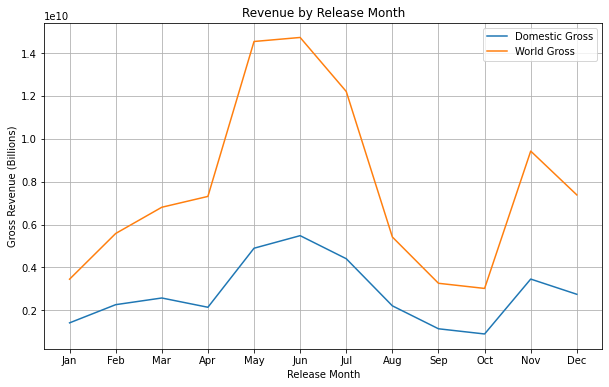

In [65]:
rcParams['figure.figsize'] = 10,6
plt.plot(df_month.droplevel(level=0))
plt.grid(True)
plt.title('Revenue by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Gross Revenue (Billions)')
plt.legend(['Domestic Gross', 'World Gross'])
plt.savefig('Rev_Month.png')
plt.show()

## Evaluation
Following the evalutation the below was confirmed;

1. The top 5 movie studios are Disney, Universal, 20th Century, Warner Bros and Sony.
2. Action / Adventure movies are the highest grossing.
3. The best months to release these movies is across May and June.
4. Ratings and movie length do not correlate with gross revenue.
5. No additional metrics stood out, however further analysis could be done on the above points or more data sets.

It is indicated that Microsoft should explore making action/adventure movies as a first step into their new venture. However it must be noted these movie genres require significant investment.

Further analysis into established movie studios could be undertaken such as franchise performance e.g. Marvel, DC, James Bond and Fast & Furious.

While the ratings do not correlate with gross revenue, it may be useful to conduct further analysis on this metric in profit/loss percentage values.

## Conclusions
Three recommendations resulting from the analysis are:

1. Explore partnership opportunities with established movie studios, much like Disney and Sony with Spider-Man movies.
2. Investigate making Action/Adventure movies.
3. Releasing these movies across May/June.

Next Steps:
1. Analyse streaming services performance along with box office data e.g. Netflix, Amazon Prime.
2. Explore smaller budget and/or foreign language films markets as they still may yield attractive profits.
3. There is a possiblity the high grossing movie studios are not interested in partnership opportunities so it may be worth approaching smaller companies.